## Example from Heyjobs

### Reading data and Plotting Trend

In [2]:
df <- read.csv(file = 'forecasting_crm.csv')
head(df)

,date_dt,overall_application
,<chr>,<int>
1,2021-01-01,9619
2,2021-02-01,6601
3,2021-03-01,7637
4,2021-04-01,4954
5,2021-05-01,6782
6,2021-06-01,4456


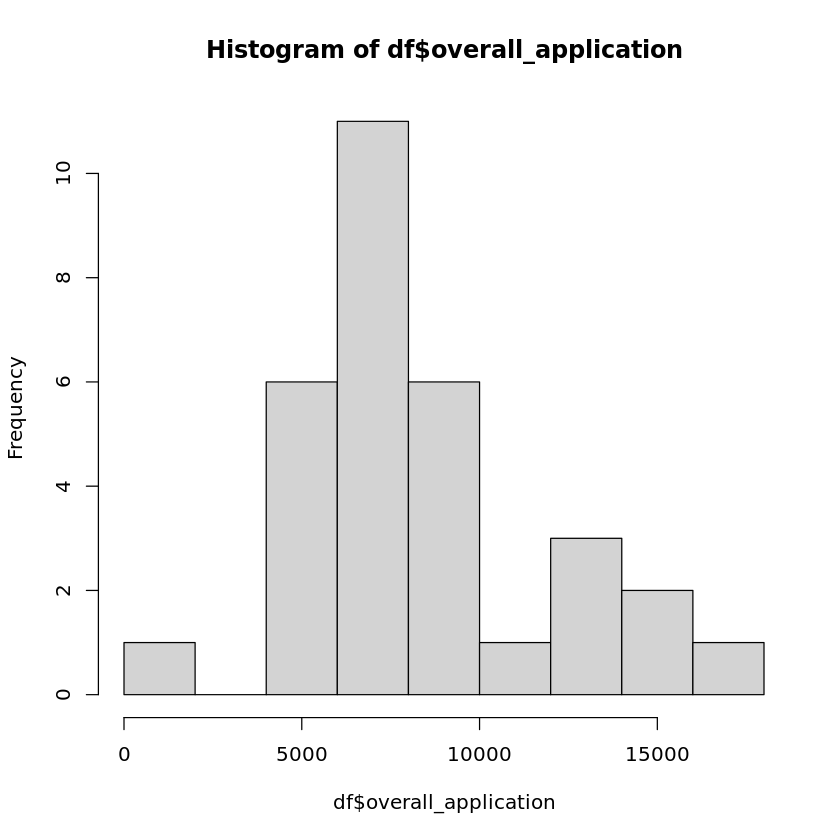

In [3]:
hist(df$overall_application)

In [4]:
install.packages("ggplot2")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [5]:
sum(is.na(df$date_dt))


[1] 0

In [6]:
unique(df$date_dt)


[1] "2021-01-01" "2021-02-01" "2021-03-01" "2021-04-01" "2021-05-01"
 [6] "2021-06-01" "2021-07-01" "2021-08-01" "2021-09-01" "2021-10-01"
[11] "2021-11-01" "2021-12-01" "2022-01-01" "2022-02-01" "2022-03-01"
[16] "2022-04-01" "2022-05-01" "2022-06-01" "2022-07-01" "2022-08-01"
[21] "2022-09-01" "2022-10-01" "2022-11-01" "2022-12-01" "2023-01-01"
[26] "2023-02-01" "2023-03-01" "2023-04-01" "2023-05-01" "2023-06-01"
[31] "2023-07-01"

In [7]:
df$overall_application[is.na(df$overall_application)] <- 0


In [8]:
df$date_dt <- as.Date(df$date_dt)


In [9]:
df <- df[df$date_dt != as.Date("2023-07-01"), ]


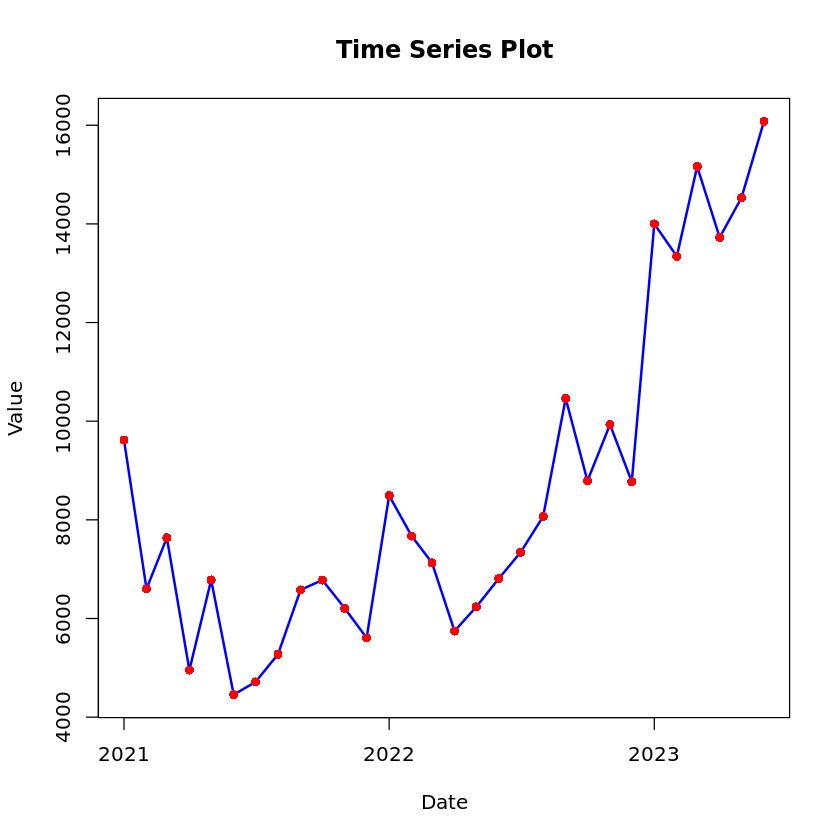

In [10]:
# Plotting the time series using base R functions
plot(df$date_dt, df$overall_application, type="l", 
     main="Time Series Plot", 
     xlab="Date", 
     ylab="Value", 
     col="blue", 
     lwd=2)

# Adding points for each data point
points(df$date_dt, df$overall_application, pch=16, col="red")

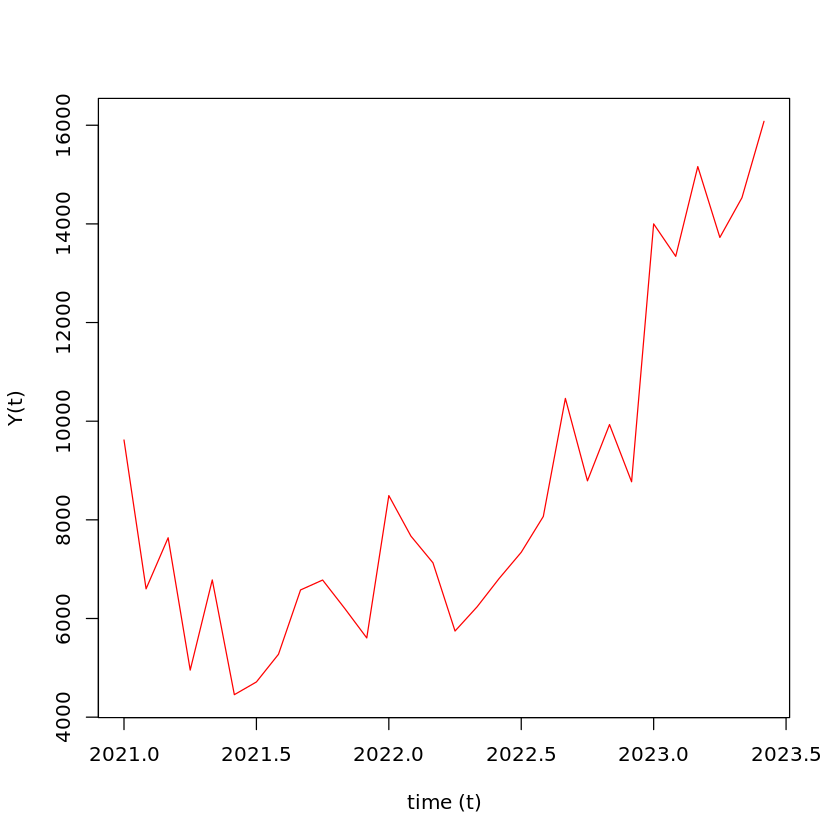

In [11]:
yt=ts(df$overall_application, start=c(2021), frequency=12)
# par(mfrow = c(1, 3), cex.lab = 1.3, cex.main = 1.3)
plot(yt, type = 'l', col='red', xlab = 'time (t)', ylab = "Y(t)")

### ACF Function

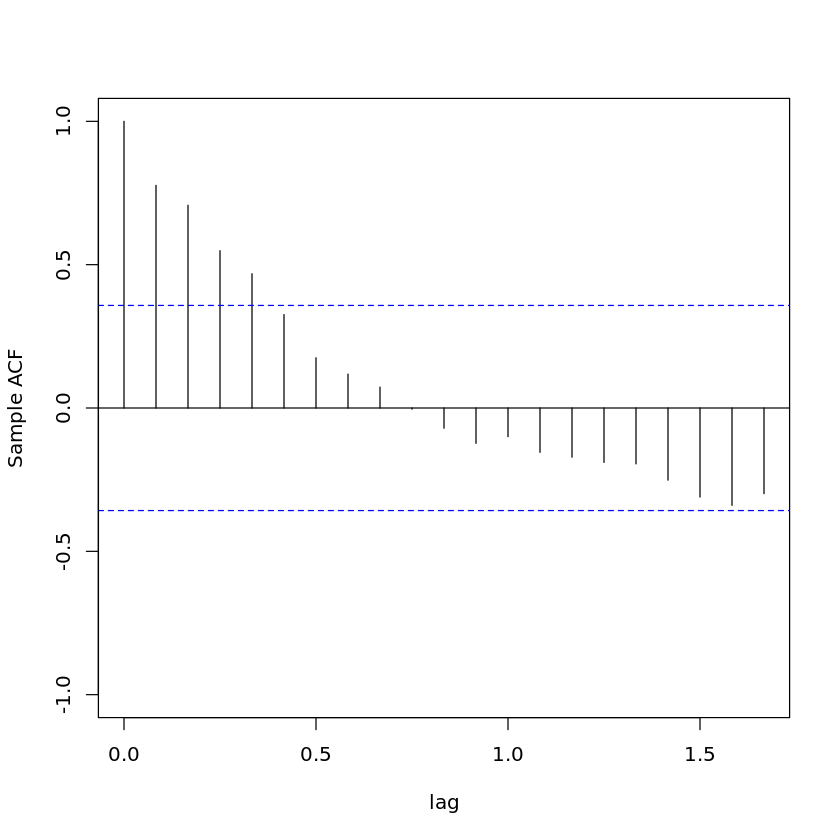

In [12]:
acf(yt, lag.max = 20, xlab = "lag",
    ylab = "Sample ACF",ylim=c(-1,1),main="")

### Smothing Processes

In [13]:
# Take first differences to remove the trend 
dfstdiff=diff(yt,differences=1)

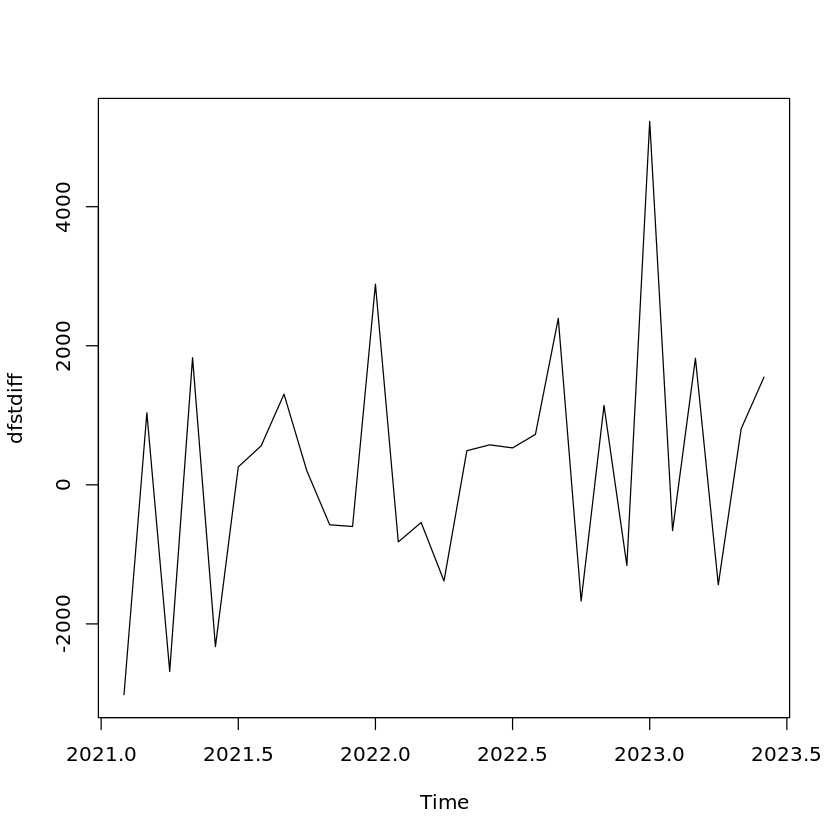

In [14]:
plot(dfstdiff) # plot the first differences (removes trend, highlights seasonality)


In [15]:
number_of_rows <- nrow(df)
print(number_of_rows)

[1] 30


In [16]:
yt

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2021,9619,6601,7637,4954,6782,4456,4714,5275,6579,6780,6205,5606
2022,8492,7671,7129,5746,6237,6812,7343,8069,10462,8791,9932,8772
2023,14000,13342,15162,13725,14530,16079,,,,,,


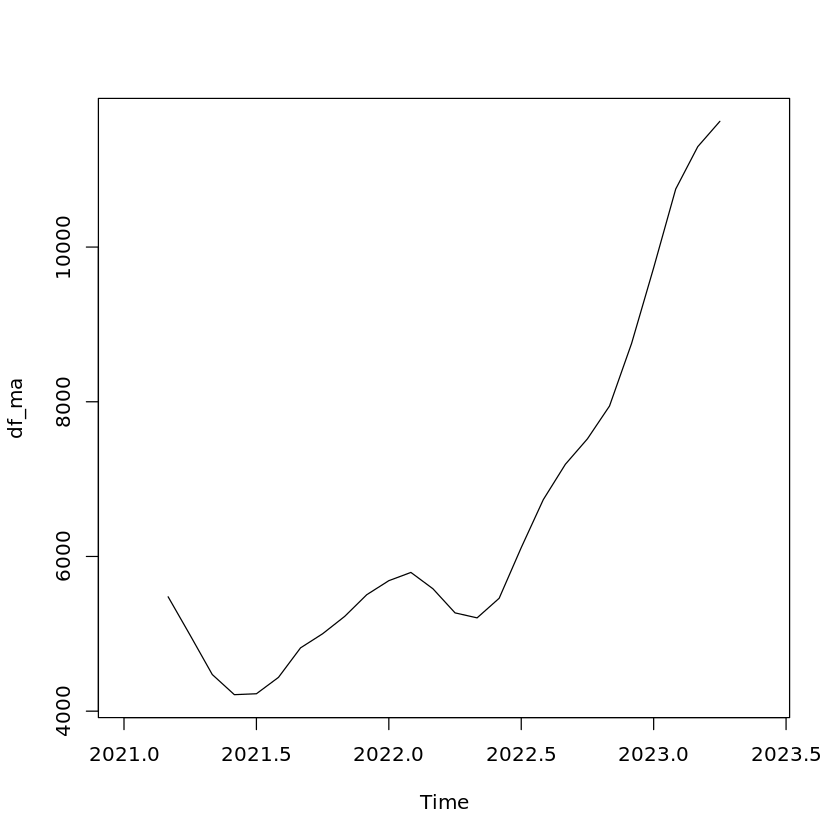

In [17]:
# Filter via moving averages to remove the seasonality 
df_ma=filter(yt,filter=c(1/10, 2/10, 2/10, 2/10, 1/10),sides=2)

# par(mfrow=c(3,1), cex.lab=1.2,cex.main=1.2)

plot(df_ma) # plot the filtered series via moving averages (removes the seasonality, highlights the trend)

### Running ACF on Smothed Series

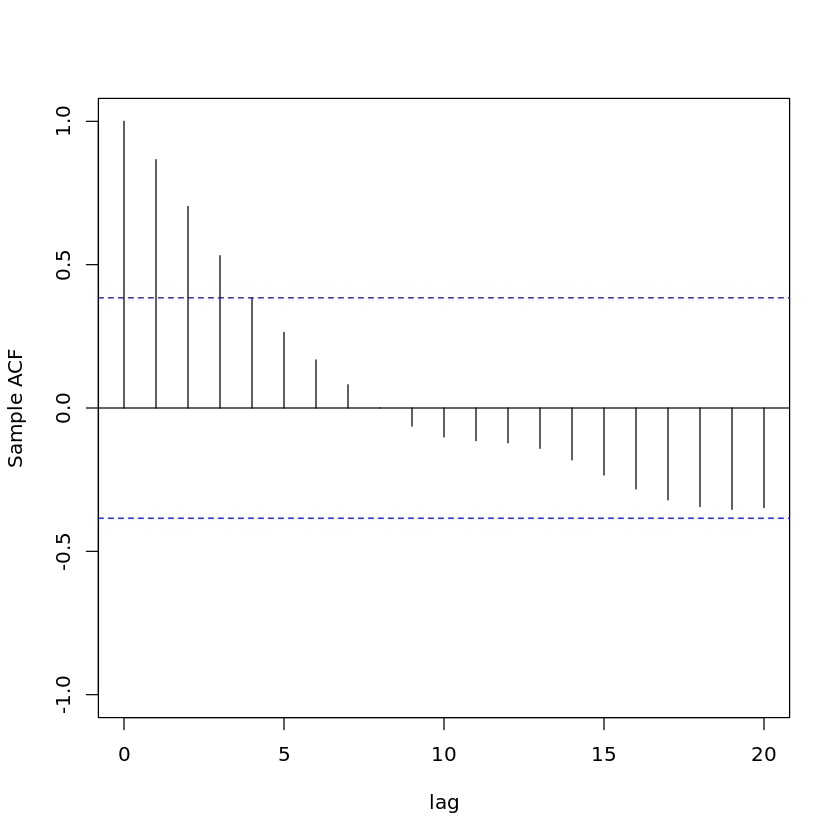

In [18]:
acf(df_ma[!is.na(df_ma)], lag.max = 20, xlab = "lag",
    ylab = "Sample ACF",ylim=c(-1,1),main="")

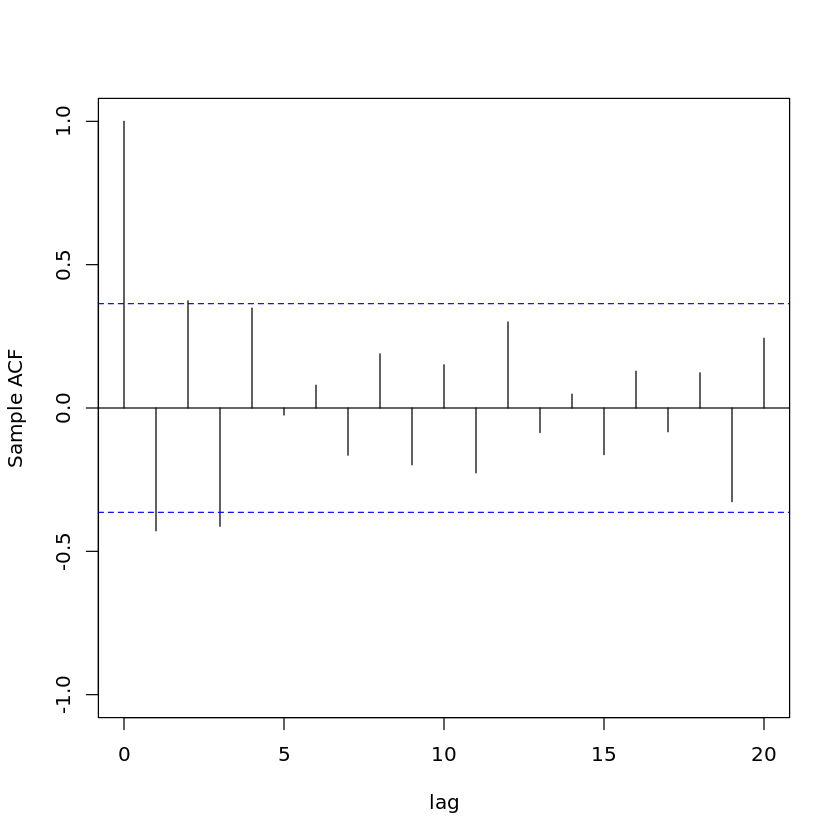

In [19]:
acf(dfstdiff[!is.na(dfstdiff)], lag.max = 20, xlab = "lag",
    ylab = "Sample ACF",ylim=c(-1,1),main="")

# Auto Regression

In [22]:
dfstdiff

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2021,,-3018,1036,-2683,1828,-2326,258,561,1304,201,-575,-599
2022,2886,-821,-542,-1383,491,575,531,726,2393,-1671,1141,-1160
2023,5228,-658,1820,-1437,805,1549,,,,,,


In [23]:
df_ma

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2021,NA,NA,5478.5,4980.3,4473.5,4213.3,4225.1,4437.2,4818.7,5000.9,5225.3,5505.7
2022,5687.2,5793.6,5582.1,5270.7,5206.2,5459.9,6114.7,6735.1,7191.9,7521.1,7945.2,8754.1
2023,9732.2,10750.5,11298.8,11625.5,NA,NA,,,,,,


In [24]:
yt

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2021,9619,6601,7637,4954,6782,4456,4714,5275,6579,6780,6205,5606
2022,8492,7671,7129,5746,6237,6812,7343,8069,10462,8791,9932,8772
2023,14000,13342,15162,13725,14530,16079,,,,,,


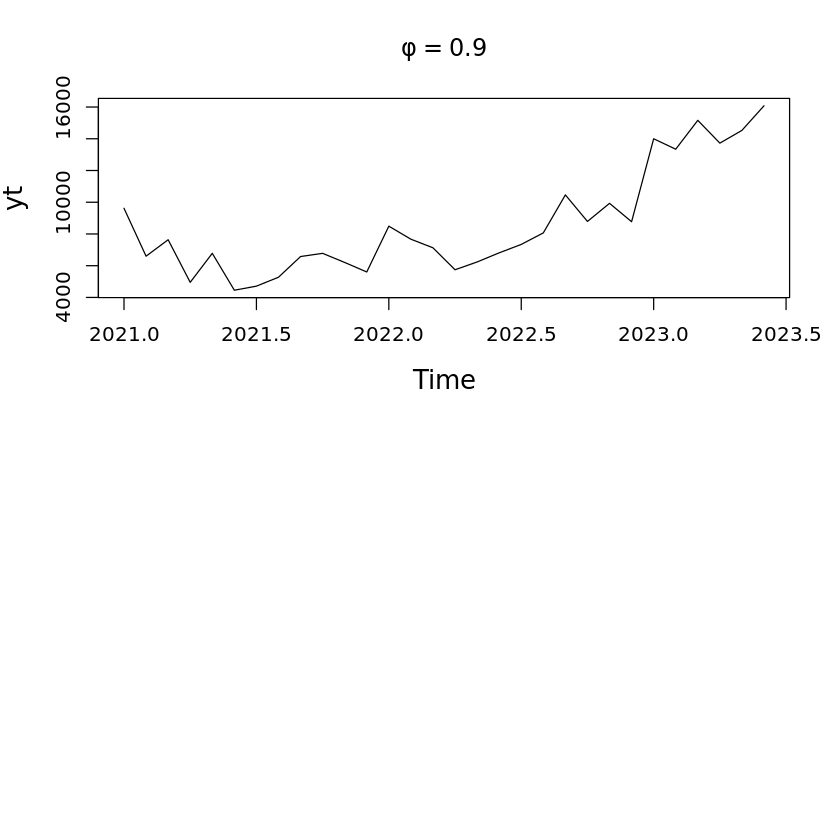

In [27]:

# sample data from 2 ar(1) processes and plot their ACF and PACF functions
#
set.seed(2021)
T=500 # number of time points
#
# sample data from an ar(1) with ar coefficient phi = 0.9 and variance 1
#
v=1.0 # innovation variance
sd=sqrt(v) #innovation stantard deviation
phi1=0.9 # ar coefficient
# yt1=arima.sim(n = T, model = list(ar = phi1), sd = sd)
#
# sample data from an ar(1) with ar coefficient phi = -0.9 and variance 1
#
phi2=-0.9 # ar coefficient
# yt2=arima.sim(n = T, model = list(ar = phi2), sd = sd)

par(mfrow = c(2, 1), cex.lab = 1.3)
plot(yt,main=expression(phi==0.9))
# plot(yt,main=expression(phi==-0.9))

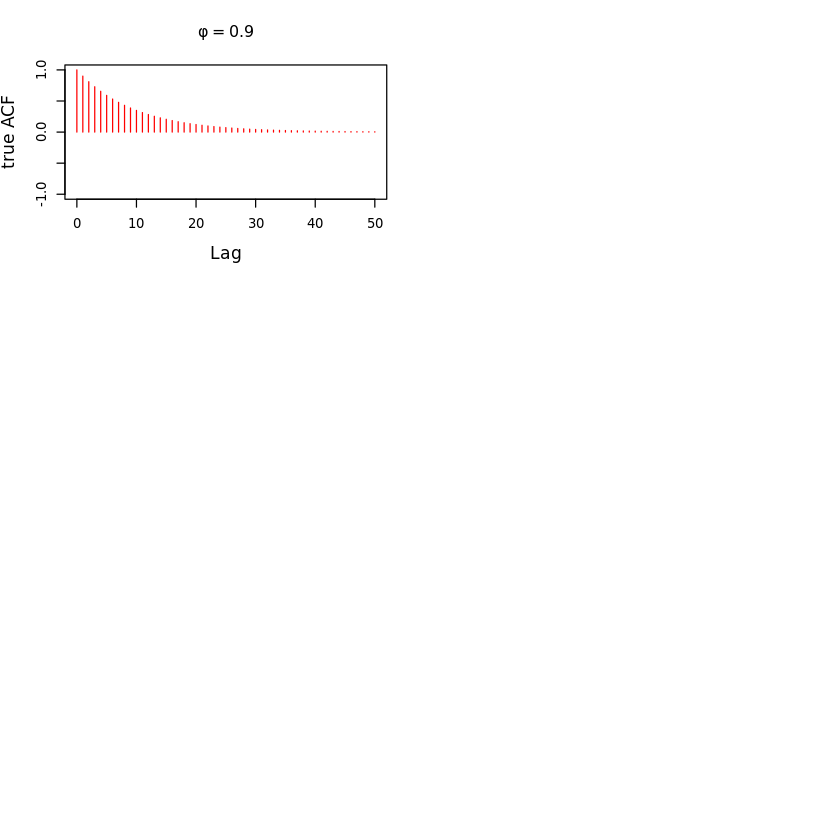

In [28]:
par(mfrow = c(3, 2), cex.lab = 1.3)
lag.max=50 # max lag
#
## plot true ACFs for both processes
#
cov_0=sd^2/(1-phi1^2) # compute auto-covariance at h=0
cov_h=phi1^(0:lag.max)*cov_0 # compute auto-covariance at h
plot(0:lag.max, cov_h/cov_0, pch = 1, type = 'h', col = 'red',
     ylab = "true ACF", xlab = "Lag",ylim=c(-1,1), main=expression(phi==0.9))

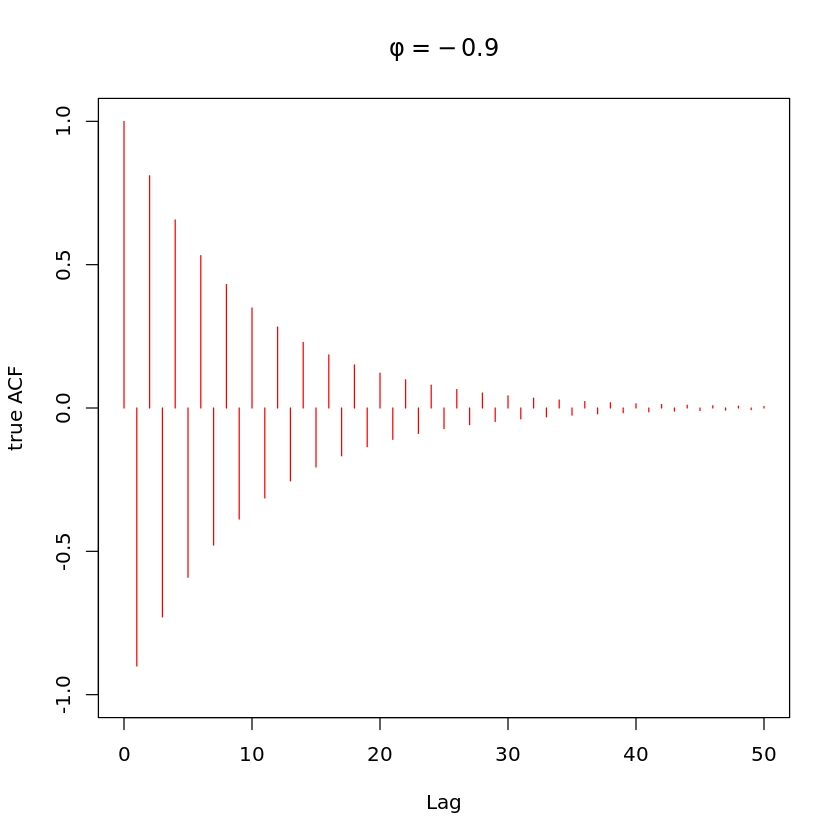

In [29]:
cov_0=sd^2/(1-phi2^2) # compute auto-covariance at h=0
cov_h=phi2^(0:lag.max)*cov_0 # compute auto-covariance at h
# Plot autocorrelation function (ACF)
plot(0:lag.max, cov_h/cov_0, pch = 1, type = 'h', col = 'red',
     ylab = "true ACF", xlab = "Lag",ylim=c(-1,1),main=expression(phi==-0.9))


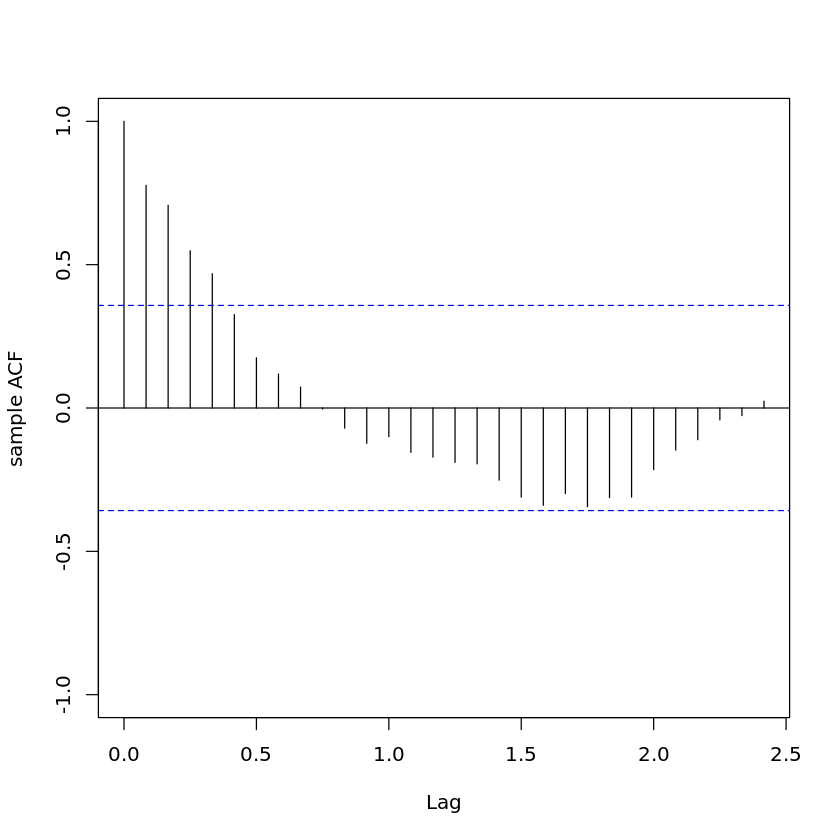

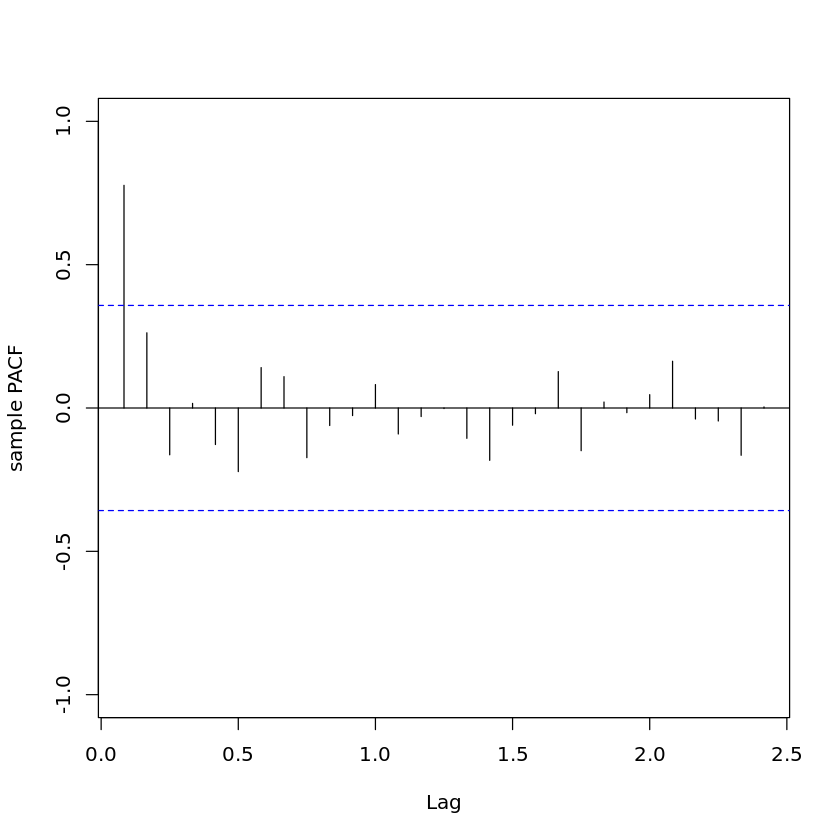

In [33]:

## plot sample ACFs for both processes
#
acf(yt, lag.max = lag.max, type = "correlation", ylab = "sample ACF",
    lty = 1, ylim = c(-1, 1), main = " ")
## plot sample PACFs for both processes
#
pacf(yt, lag.ma = lag.max, ylab = "sample PACF", ylim=c(-1,1),main="")


In [43]:
####################################################
#####             MLE for AR(1)               ######
####################################################
set.seed(2021)
phi = 0.9 # ar coefficient
v = 1
sd = sqrt(v) # innovation standard deviation
T = 500 # number of time points
# yt = arima.sim(n = T, model = list(ar = phi), sd = sd) 

## Case 1: Conditional likelihood
y = as.matrix(yt[2:T]) # response
X = as.matrix(yt[1:(T-1)]) # design matrix

# Remove any missing values
complete_cases = complete.cases(y, X)
y = y[complete_cases, ]
X = X[complete_cases, ]

phi_MLE = as.numeric((t(X) %*% y) / (t(X) %*% X)) # Corrected MLE for phi
s2 = sum((y - phi_MLE * X)^2) / (length(y) - 1) # Unbiased estimate for v 
v_MLE = s2 * (length(y) - 1) / length(y) # MLE for v

cat("\n MLE of conditional likelihood for phi: ", phi_MLE, "\n",
    "MLE for the variance v: ", v_MLE, "\n", 
    "Estimate s2 for the variance v: ", s2, "\n")



 MLE of conditional likelihood for phi:  1.01692 
 MLE for the variance v:  3042662 
 Estimate s2 for the variance v:  3151329 


In [40]:


#Using conditional sum of squares, equivalent to conditional likelihood 
arima_CSS=arima(yt,order=c(1,0,0),method="CSS",n.cond=1,include.mean=TRUE)
cat("AR estimates with conditional sum of squares (CSS) for phi and v:", arima_CSS$coef,arima_CSS$sigma2,
"\n")

#Uses ML with full likelihood 
arima_ML=arima(yt,order=c(1,0,0),method="ML",include.mean=TRUE)
cat("AR estimates with full likelihood for phi and v:", arima_ML$coef,arima_ML$sigma2,
"\n")

# #Default: uses conditional sum of squares to find the starting point for ML and 
# #         then uses ML 
# arima_CSS_ML=arima(yt,order=c(1,0,0),method="CSS-ML",n.cond=1,include.mean=FALSE)
# cat("AR estimates with CSS to find starting point for ML for phi and v:", 
# arima_CSS_ML$coef,arima_CSS_ML$sigma2,"\n")


AR estimates with conditional sum of squares (CSS) for phi and v: 0.9430639 12222.95 2985856 
AR estimates with full likelihood for phi and v: 0.891417 10091.81 2913048 


In [44]:

## MLE, full likelihood AR(1) with v=1 assumed known 
# log likelihood function
log_p <- function(phi, yt){
  0.5*(log(1-phi^2) - sum((yt[2:T] - phi*yt[1:(T-1)])^2) - yt[1]^2*(1-phi^2))
}

# Use a built-in optimization method to obtain maximum likelihood estimates
result =optimize(log_p, c(-1, 1), tol = 0.0001, maximum = TRUE, yt = yt)
cat("\n MLE of full likelihood for phi: ", result$maximum)



Warning message in optimize(log_p, c(-1, 1), tol = 1e-04, maximum = TRUE, yt = yt):
“NA/Inf replaced by maximum positive value”
Warning message in optimize(log_p, c(-1, 1), tol = 1e-04, maximum = TRUE, yt = yt):
“NA/Inf replaced by maximum positive value”
Warning message in optimize(log_p, c(-1, 1), tol = 1e-04, maximum = TRUE, yt = yt):
“NA/Inf replaced by maximum positive value”
Warning message in optimize(log_p, c(-1, 1), tol = 1e-04, maximum = TRUE, yt = yt):
“NA/Inf replaced by maximum positive value”
Warning message in optimize(log_p, c(-1, 1), tol = 1e-04, maximum = TRUE, yt = yt):
“NA/Inf replaced by maximum positive value”
Warning message in optimize(log_p, c(-1, 1), tol = 1e-04, maximum = TRUE, yt = yt):
“NA/Inf replaced by maximum positive value”
Warning message in optimize(log_p, c(-1, 1), tol = 1e-04, maximum = TRUE, yt = yt):
“NA/Inf replaced by maximum positive value”
Warning message in optimize(log_p, c(-1, 1), tol = 1e-04, maximum = TRUE, yt = yt):
“NA/Inf replaced by 


 MLE of full likelihood for phi:  0.9999516

## Bayesian in AR

In [50]:
yt

[1]  9619  6601  7637  4954  6782  4456  4714  5275  6579  6780  6205  5606
[13]  8492  7671  7129  5746  6237  6812  7343  8069 10462  8791  9932  8772
[25] 14000 13342 15162 13725 14530 16079

[1] 1.016920e+00 3.151329e+06


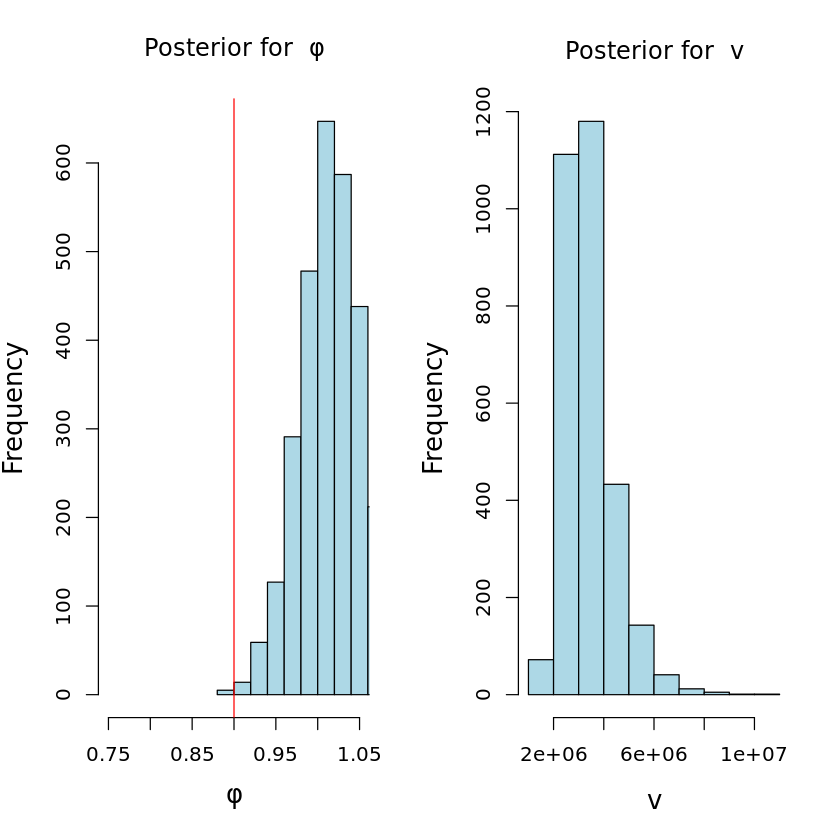

In [53]:

T=30 # number of time points

y=as.matrix(yt[2:T]) # response
X=as.matrix(yt[1:(T-1)]) # design matrix
phi_MLE=as.numeric((t(X)%*%y)/sum(X^2)) # MLE for phi
s2=sum((y - phi_MLE*X)^2)/(length(y) - 1) # Unbiased estimate for v
v_MLE=s2*(length(y)-1)/(length(y)) # MLE for v 

print(c(phi_MLE,s2))

#######################################################
######     Posterior inference, AR(1)               ###
######     Conditional Likelihood + Reference Prior ###
######     Direct sampling                          ###
#######################################################

n_sample=3000   # posterior sample size

## step 1: sample posterior distribution of v from inverse gamma distribution
v_sample=1/rgamma(n_sample, (T-2)/2, sum((yt[2:T] - phi_MLE*yt[1:(T-1)])^2)/2)

## step 2: sample posterior distribution of phi from normal distribution
phi_sample=rep(0,n_sample)
for (i in 1:n_sample){
phi_sample[i]=rnorm(1, mean = phi_MLE, sd=sqrt(v_sample[i]/sum(yt[1:(T-1)]^2)))}

## plot histogram of posterior samples of phi and v
par(mfrow = c(1, 2), cex.lab = 1.3)
hist(phi_sample, xlab = bquote(phi), 
     main = bquote("Posterior for "~phi),xlim=c(0.75,1.05), col='lightblue')
abline(v = phi, col = 'red')
hist(v_sample, xlab = bquote(v), col='lightblue', main = bquote("Posterior for "~v))
abline(v = sd, col = 'red')

